# Project: Investigate a Dataset - No-Show Medical Appointments

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description

The dataset provided collects information from 100k medical appointments in Brazil and shows whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The columns are:
- <i><b>PatientId</b></i>: Identification of a patient
- <i><b>AppointmentID</b></i>: Identification of each appointment
- <i><b>Gender</b></i>: Male or Female, where Female is the greater proportion.
- <i><b>ScheduledDay</b></i>: The day someone called or registered the appointment, this is before appointment of course.
- <i><b>AppointmentDay</b></i>: The day of the actuall appointment, when they have to visit the doctor.
- <i><b>Age</b></i>: How old is the patient.
- <i><b>Neighbourhood</b></i>: Where the appointment takes place.
- <i><b>Scholarship</b></i>: True of False. Whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
- <i><b>Hipertension</b></i>: True or False
- <i><b>Diabetes</b></i>: True or False
- <i><b>Alcoholism</b></i>: True or False
- <i><b>Handcap</b></i>: True or False
- <i><b>SMS_received</b></i>: 1 or more messages sent to the patient.
- <i><b>No-show</b></i>: True or False. it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not. show up.


## Questions for Analysis

The questions which would be asked during this analysis are:

- What is the percentage of the no-show up patients for their medical appointments?
- What are the most common diseases that affects directly on the no showing of a patient for thier schceduled appointment?
- Is enrolling to the Brasilian welfare program affects negatively or positively on showing up for the appointments?
- Which category of people would likely dont show up for midical appointments (young males, old males, young females, or old females)?
- Does the day of the appointment affects the no showing up?
- How Sending SMS to the patient correlated with the showing up to appoinments?


## Libraries to be used in the project (numpy, pandas, matplotlib.pyplot, IPython.display): 

In [1]:
# libraries needed for data manibulation:
import numpy as np
import pandas as pd

#Libraries nedded for better display and plotting
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
% matplotlib inline

## Upgrade pandas: 

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0;

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling

## General Properties

### - Reading CSV file from the directory: 

In [2]:
# file path
file = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'

# read file from the file path
df = pd.read_csv(file, sep=',')

### - Number of rows and columns in the data: 

In [3]:
# number of rows 
rows = df.shape[0]

#number of columns
columns = df.shape[1]

print("Rows: {}\nColumns: {}".format(rows, columns))

Rows: 110527
Columns: 14


### - First 5 rows of the data for data inspection: 

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### - Last 5 rows of the data for data inspection: 

In [5]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### - Data information (data types, and number of non-null):  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###  - Is there any Duplicated rows?

In [7]:
df.duplicated().any()

False

>No duplicated rows found.

###  - Is there any null values?

In [8]:
df.isnull().all().any()

False

>No null values found.

###  - Overall Describtion of the data:

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Notes:
- in Age column the minimum age is (-1) this means that Age data needs to be cleaned. 
- for Scholarship, Hipertension, Diabetes, Alcoholism, and Handcap columns the mean value doesnot mean anything so it is better to change their types to boolean.
- for sms_recieved the max number of sms is 1 so it can be changed into boolean too (either recieved or not).  

## Data Cleaning
### - Defining some functions that would be used in data cleaning: 

In [10]:
def df_display(df, num_of_rows):
    """
    Displays number of rows from the beginning of a pandas data frame. 
    Args:
        (Pandas DataFrame) df - a data frame to be displayed
        (int) num_of_rows - number of rows to be displayed   
    Returns:
        a print of the data frame with number of rows and columns displayed
    """
    #display first number of Rows of a given data frame
    display(df.head(num_of_rows))
    
    # display the number of rows and columns of a given data frame
    print("(Rows, Columns): ", df.shape) 

### - Cleaning Step 1: Drop unneeded columns in the analysis:
#### PatientId, AppointmentID, and ScheduledDay columns would be udneeded for our investigation:		

In [11]:
#define the uneeded columns
drop_columns = ['PatientId', 'AppointmentID', 'ScheduledDay']

#check if the columns are in the data frame and then drop them
if(set(drop_columns).issubset(set(df.columns))):
    df.drop(drop_columns, axis=1, inplace=True)

# display data frame to ensure the dropping of the uneeded columns
df_display(df, 1) 

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


(Rows, Columns):  (110527, 11)


###  - Cleaning Step 2: Change Columns names to be easy to use:
#### It is easier to work with lower case columns' names seperated with underscores

In [12]:
# change columns names to lower case
df.rename(columns = lambda col_name:col_name.strip().lower(), inplace=True)

#display the dataframe to see changes in columns names
df_display(df, 1) 

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


(Rows, Columns):  (110527, 11)


In [13]:
#check if "appointmentday" is in columns and change it to "appointment_day"
if('appointmentday' in df.columns):
    df.rename(columns={'appointmentday':'appointment_day'}, inplace=True)

#check if "no-show" is in columns and change it to "no_show"    
if('no-show' in df.columns):    
    df.rename(columns={'no-show':'no_show'}, inplace=True)

#display the dataframe to see changes in columns names    
df_display(df, 1)

,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


(Rows, Columns):  (110527, 11)


###  - Cleaning Step 3: Changing some of the data types to be more convenient:
#### Show data types for each column: 

In [14]:
df.dtypes

gender             object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

#### Change appointment_day from "<i>string</i>" to "<i>date/time</i>" type:

In [15]:
df.appointment_day = pd.to_datetime(df.appointment_day)

#### Cahnge (scholarship, hipertension, diabetes, alcoholism, handcap, and sms_received) from <i>"Integer"</i>  to <i>"Boolean"</i>" : 

In [16]:
#define columns needed to be boolean
bool_columns = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

#loop in boolean data columns and change them to boolean data type
for col in bool_columns:
    df[col] = df[col].astype(bool)

#### Change no_show column from <i>"String"</i> to <i>"Boolean"</i> (Yes-> True (the patient didnot show up), No-> False):


In [17]:
#define a map for our values:
string_bool_map = {'Yes':True, 'No':False}

#then assisgn this map to the no_show column:
df.no_show = df.no_show.map(string_bool_map)

#### Display dtypes after cleaning: 

In [18]:
df.dtypes

gender                     object
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                  bool
hipertension                 bool
diabetes                     bool
alcoholism                   bool
handcap                      bool
sms_received                 bool
no_show                      bool
dtype: object

### - Cleaning Step 4: Extract days of week from appointment_day column:
#### In the exploring of data the relation between the day of the week and the no-show would be explored 

In [19]:
#extract day name from appointment_day and assign it to appointment_week_day column
df['appointment_week_day'] = df.appointment_day.dt.weekday_name

###  - Cleaning Step 5: Clean age data:
#### Dealing with negative ages:

In [20]:
#find all negative ages
df.query('age < 0') 

,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day
99832,F,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,False,Monday


> There is only one row with negative age therfore removing this row will not affect the exploring of data

In [21]:
#drop the row with negative age
neg_age_index = df.query('age < 0').index[0]
df.drop([neg_age_index], inplace=True)  

In [22]:
#check again if there are negative ages
df.query('age < 0') 

,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day


#### visualize ages data and remove outliers:

Median age:  37.0
Min age limit:  -37.5
Max age limit:  110.5


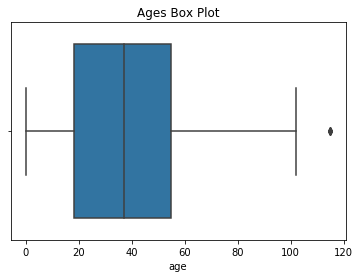

In [23]:
#plot a box chart for the ages values
sns.boxplot(df.age).set_title('Ages Box Plot');

# define the first, second, and third quartiles for ages values 
q1 = df.age.describe()['25%']
q2 = df.age.describe()['50%']
q3 = df.age.describe()['75%']

#get the Interquartile range
iqr = q3 - q1

#get the max, and the min limits for ages and print them
min_age_limit = q1 - (1.5*iqr)
max_age_limit = q3 + (1.5*iqr)
print("Median age: ", q2)
print("Min age limit: ", min_age_limit)
print("Max age limit: ", max_age_limit)

> Since there is no negative ages the minimum age limit would be considered zero

In [24]:
# change min age limit to be zero instead of a negative value
min_age_limit = 0

In [25]:
#remove outlires in age column
df = df.query('age >= {} and age <= {}'.format(min_age_limit, max_age_limit))

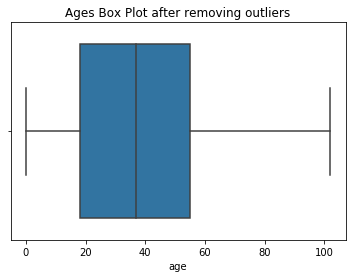

In [26]:
#visualize age again to make sure outliers are removed
sns.boxplot(df.age).set_title('Ages Box Plot after removing outliers'); 

### - See description for, display, and save cleaned data: 

In [27]:
df.describe() 

,age
count,110521.000000
mean,37.085694
std,23.104606
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,102.000000


> Range of ages are now from 0 to 102 which is more convenient. although having 0 ages might be illogical and considered alimitation in this data. Also, other categorical data does not appear in the describtion which is more convenient.

In [28]:
# display the cleaned data
df_display(df, 10)

,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day
0,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,Friday
2,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,Friday
5,F,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,False,Friday
6,F,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,True,Friday
7,F,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,True,Friday
8,F,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,False,Friday
9,F,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,False,Friday


(Rows, Columns):  (110521, 12)


In [29]:
# save cleaned data in another file
file_clean = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016_cleaned.csv' 
df.to_csv(file_clean, index=False)

In [30]:
#use the cleaned data directly from here
file_clean = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016_cleaned.csv' 
df_clean = pd.read_csv(file_clean)
df_display(df_clean, 5)

,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day
0,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,Friday
2,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,Friday


(Rows, Columns):  (110521, 12)



<a id='eda'></a>
# Exploratory Data Analysis

### - Defining some functions and variables that would be used in data exploring and visualizations: 

In [31]:
#get number of patients' appointments
number_of_patients = df_clean.shape[0]
number_of_patients

110521

In [32]:
#define figures' sizes which will be sed for exploring data 
fig_size = (6,6)

#define font size for figures' titles
font_size = 14

In [33]:
def pie_plot(data, title, labels):
    """
    Plot a pie chart for given data.
    Args:
        (Pandas Series) data - a data needed to be ploted.
        (String) title - title for the figure.
        (list) labels - list of labels for the pie plot.
    """ 
    # figure proberties
    fig = plt.figure(figsize=fig_size);
    fig.suptitle(title, fontsize=font_size);
    
    # pie plot
    plt.pie(data, labels=labels, autopct='%1.1f%%');
    
    #legend
    plt.legend()

In [34]:
def bar_plot(positions, hights, title, x_label, y_label):
    """
    Plot a bar chart for given data.
    Args:
        (list) positions - a list for x-axis positions in the figure.
        (Pandas Series) hights - the hights in y-axis.
        (String) title - title for the figure.
        (String) x_label - title for the x_axis.
        (String) y_label - title for the y_axis.
    """
    positions_indices = np.arange(len(positions))  
    
    # figure proberties
    fig = plt.figure(figsize=fig_size);
    fig.suptitle(title, fontsize=font_size);
    
    # bar plot
    plt.bar(positions_indices, hights);
    
    #labels and ticks
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.xticks(positions_indices, positions)

### - Research Question 1: What is the percentage of the no-show up patients for their medical appointments?

In [35]:
# lets see the number of no-show up patients in the data
no_show_counts = df_clean.no_show.value_counts() #no_show: (False: showed up, True: Didnot show up)
pd.DataFrame(no_show_counts)

,no_show
False,88205
True,22316


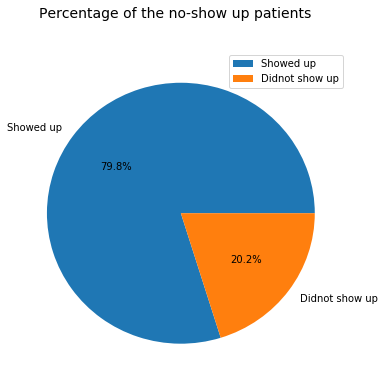

In [36]:
# display a pie chart for the no-show patients
data = no_show_counts
labels = ['Showed up','Didnot show up']
title = 'Percentage of the no-show up patients'
pie_plot(data, title, labels)

> 20.2% of patients in this data didnot show up for their appointment, this percentage is the core of this Analysis. the questions would try to answer why those 20.2% didnot show up and what are the most factors affecting their showing up for midical appointments.

### - Research Question 2: What are the most common diseases that affects directly on the no showing of a patient for thier schceduled appointment?
#### First lets define the diseases list in our data

In [37]:
diseases = ['hipertension', 'diabetes', 'alcoholism', 'handcap']

> Notice that handcap is not a disease but it is considered like that for the sake of the explorition.

#### Percentage of patients having those diseases

In [38]:
# number of ptients with a spacific disease
diseases_counts = df_clean[diseases].sum()
pd.DataFrame(diseases_counts, columns=['number_of_patients'])

,number_of_patients
hipertension,21800
diabetes,7943
alcoholism,3360
handcap,2237


In [39]:
# percentage of patients from the total number of patients with a spacific disease 
diseases_percentages = (diseases_counts/number_of_patients).sort_values()
pd.DataFrame(diseases_percentages, columns=['percentage_of_patients'])

,percentage_of_patients
handcap,0.020240
alcoholism,0.030401
diabetes,0.071869
hipertension,0.197248


In [40]:
# order diseases according to their percentage values in ascending order
diseases = diseases_percentages.index.tolist()
diseases

['handcap', 'alcoholism', 'diabetes', 'hipertension']

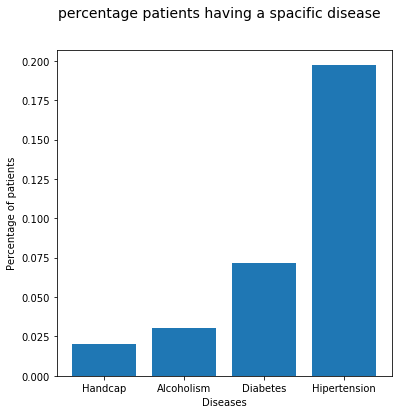

In [41]:
# Bar Plot Percentage Values
positions = [d.title() for d in diseases] #Captlize first letter in diseases
hights = diseases_percentages
title = 'percentage patients having a spacific disease'
x_label = 'Diseases'
y_label = 'Percentage of patients'
bar_plot(positions, hights, title, x_label, y_label);

> A Large percentage  of patients are having hipertention about 20%, while Handcap is about 2%, Alcoholism is about 3% and Diabetes is about 7%. Next lets see the percentage of no-show in each disease category.

#### Percentage of patients that have a spacific disease and didnot show up for their apointment

In [42]:
# from patients that have diseases how many of them didnot show up for their appointments  
df_clean.groupby('no_show').sum()[diseases]

,handcap,alcoholism,diabetes,hipertension
no_show,,,,
False,1833.0,2683.0,6513.0,18028.0
True,404.0,677.0,1430.0,3772.0


In [43]:
# get the number of patients that have a spacific disease and didnot show up for their appointments
no_show_diseases_counts = df_clean.groupby('no_show').sum().loc[True, diseases]
pd.DataFrame(no_show_diseases_counts).rename(columns={True: 'no_show_count'})

,no_show_count
handcap,404.0
alcoholism,677.0
diabetes,1430.0
hipertension,3772.0


In [44]:
# get percentage of patients that have a spacific disease and didnot show up (from total number of patients having this disease) 
no_show_diseases_percentages = (no_show_diseases_counts/diseases_counts).sort_values()
pd.DataFrame(no_show_diseases_percentages, columns=['no_show_percentage'])

,no_show_percentage
hipertension,0.173028
diabetes,0.180033
handcap,0.180599
alcoholism,0.201488


In [45]:
# order diseases according to their percentage values
diseases = no_show_diseases_percentages.index.tolist()
diseases

['hipertension', 'diabetes', 'handcap', 'alcoholism']

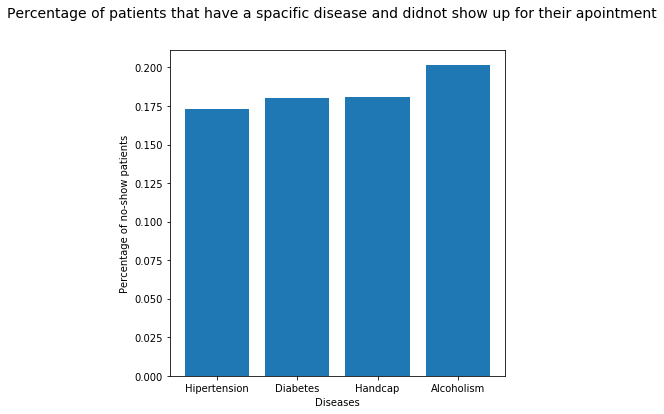

In [46]:
# Bar Plot Percentage Values
positions = [d.title() for d in diseases] #Captlize first letter in diseases
hights = no_show_diseases_percentages
title = 'Percentage of patients that have a spacific disease and didnot show up for their apointment'
x_label = 'Diseases'
y_label = 'Percentage of no-show patients'
bar_plot(positions, hights, title, x_label, y_label);

> Although large percentage of patients suffer from hipertention, the last figure showed that hipertention has the least impact in no-showing up for appointments with 17% percentge. on the other hand Alcoholism plays the largest part in not showing for appionments with apercentage of 20%, Next comes Hancap and Diabetes with 18% each.

### - Research Question 3: Is enrolling to the Brasilian welfare program affects negatively or positively on showing up for the appointments?
#### Lets see how many patients have scholarship in Bolsa Familia

In [47]:
# number of patients that have scholership verses patients that have no scholership 
scholarship_counts = df_clean.scholarship.value_counts()
pd.DataFrame(scholarship_counts)

,scholarship
False,99660
True,10861


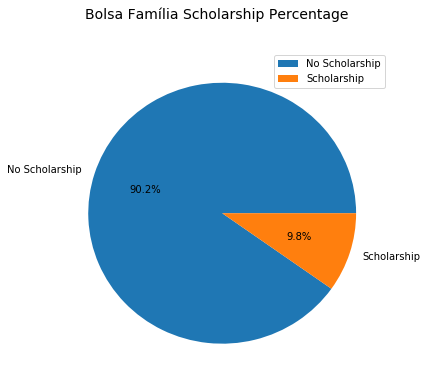

In [48]:
# pie Plot values
data = scholarship_counts;
labels = ['No Scholarship', 'Scholarship'];
title = 'Bolsa Família Scholarship Percentage'
pie_plot(data, title, labels)

> Only 9.8% of patients have Bosla Familia Scholarship, this can affect our judgment on it relationship with no-showing up. so the the analysis in this step will consider only patients with scholarships.

#### lets see How many of them didnot show up for appointments

In [49]:
# number of people having scholership and didnot show up for thier appointments
no_show_scholarship_counts = df_clean.groupby('no_show').sum().scholarship
pd.DataFrame(no_show_scholarship_counts)

,scholarship
no_show,
False,8283.0
True,2578.0


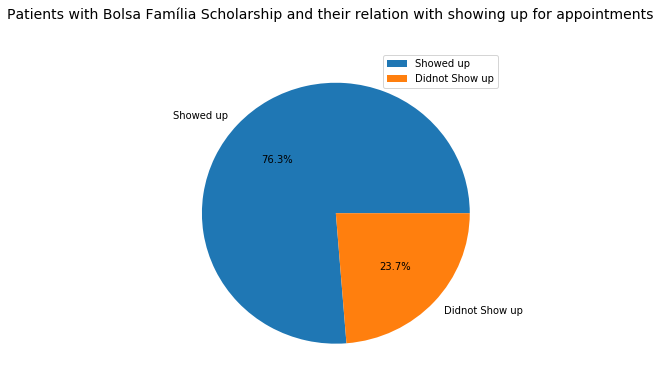

In [50]:
# pie plot percentages
data = no_show_scholarship_counts;
labels = ['Showed up', 'Didnot Show up'];
title = 'Patients with Bolsa Família Scholarship and their relation with showing up for appointments'
pie_plot(data, title, labels)

>23.7% from patients having Bolsa Família Scholarship didnot show up for the appointment and 76.3% of them showed up which means that the scholership might have a positive impact in showing up for the midical appointments.

###  - Research Question 4: Which category of people would likely dont show up for midical appointments (young males, old males, young females, or old females)?
#### Define functions and variebles needed for tis section

In [51]:
def calculate_no_show_percentage(patients):
    """
    Calculates no show pecetange for a spacific patients category.
    Args:
        (Pandas DataFrame) patients - data for spacific patients category.
    Returns:
         (float) no show percentage for spacific patients category.
    """
    # total number of patients in the given data
    patients_counts = patients.shape[0]
    
    # number of patients that didnot show for appointments in the given data
    patients_no_show_counts = patients.no_show.value_counts()[True]
    
    # return the percentage of patients that didnot show up (from total patients number in the given data) 
    return patients_no_show_counts/patients_counts

In [52]:
# define the middle age where data would be split
middle_age = df_clean.age.median()
middle_age

37.0

#### Calculate percentage of young males who didnot show up 

In [53]:
young_males = df_clean.query('age <= {} and gender=="M"'.format(middle_age))
young_males_no_show_percentage = calculate_no_show_percentage(young_males)
young_males_no_show_percentage

0.22413308341143393

#### Calculate percentage of old males who didnot show up 

In [54]:
old_males = df_clean.query('age > {} and gender=="M"'.format(middle_age))
old_males_no_show_percentage = calculate_no_show_percentage(old_males)
old_males_no_show_percentage

0.16959704848100537

#### Calculate percentage of young females who didnot show up 

In [55]:
young_females = df_clean.query('age <= {} and gender=="F"'.format(middle_age))
young_females_no_show_percentage = calculate_no_show_percentage(young_females)
young_females_no_show_percentage

0.22941108810674027

#### Calculate percentage of old females who didnot show up 

In [56]:
old_females = df_clean.query('age > {} and gender=="F"'.format(middle_age))
old_females_no_show_percentage = calculate_no_show_percentage(old_females)
old_females_no_show_percentage

0.17844999730152733

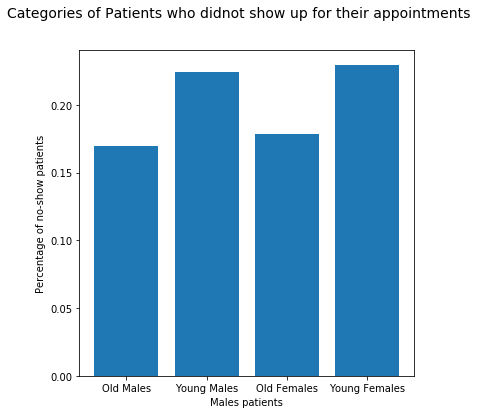

In [57]:
# Bar Plot the calculated percentages
positions = ['Old Males', 'Young Males', 'Old Females', 'Young Females'] 
hights = [old_males_no_show_percentage, young_males_no_show_percentage, old_females_no_show_percentage, young_females_no_show_percentage]
title = 'Categories of Patients who didnot show up for their appointments '
x_label = 'Males patients'
y_label = 'Percentage of no-show patients'
bar_plot(positions, hights, title, x_label, y_label);

> Despite of gender young patients tend to not showing up for their appointments more than old patients.

### - Research Question 5: Does the day of the appointment affects the no showing up?

In [58]:
# total number of appointments in each day of the week
day_counts = df_clean.appointment_week_day.value_counts()
pd.DataFrame(day_counts).rename(columns={'appointment_week_day': 'number_of_appointments'})

,number_of_appointments
Wednesday,25867
Tuesday,25640
Monday,22712
Friday,19018
Thursday,17245
Saturday,39


In [59]:
# number of no show pateints in each day of the week
day_no_show_counts = df_clean.groupby('appointment_week_day').sum().no_show
pd.DataFrame(day_no_show_counts)

,no_show
appointment_week_day,
Friday,4037.0
Monday,4689.0
Saturday,9.0
Thursday,3336.0
Tuesday,5152.0
Wednesday,5093.0


In [60]:
# percentage of no show patients in each day of the week in ascending order
day_no_show_percentages = (day_no_show_counts/day_counts).sort_values()
pd.DataFrame(day_no_show_percentages,columns=['no_show_percentage'])

,no_show_percentage
Thursday,0.193447
Wednesday,0.196892
Tuesday,0.200936
Monday,0.206455
Friday,0.212273
Saturday,0.230769


In [61]:
# days' names in order
days = day_no_show_percentages.index.tolist()
days

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Saturday']

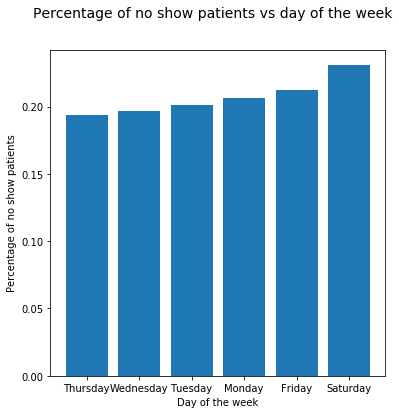

In [62]:
# bar plot the calculated percentages
positions = days 
hights = day_no_show_percentages
title = 'Percentage of no show patients vs day of the week'
x_label = 'Day of the week'
y_label = 'Percentage of no show patients'
bar_plot(positions, hights, title, x_label, y_label);

> The percentages are in range (19% - 23%), with satursday having the largest prcentage and thursday having the lowest percentage.
The percentages are close to each other which indicates that the day of the week doesnot have a strong impact in not showiong up for appointments.

### - Research Question 6: How Sending SMS to the patient correlated with the showing up to appoinments?

In [63]:
# number of patients recieving a sms verses patients that didnot recieve a sms
sms_counts = df_clean.sms_received.value_counts()
pd.DataFrame(sms_counts)

,sms_received
False,75040
True,35481


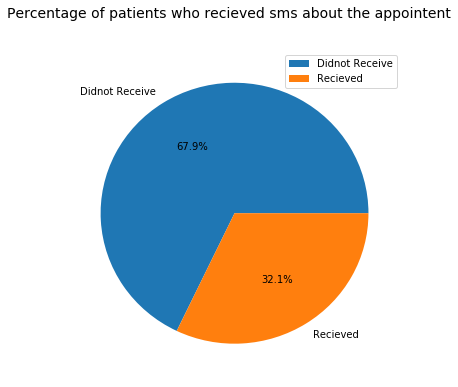

In [64]:
# pie plot sms percentages
data = sms_counts
labels = ['Didnot Receive', 'Recieved'];
title = 'Percentage of patients who recieved sms about the appointent'
pie_plot(data, title, labels)

> 32.1% of patient recieved sms about their appointment. lets see how many of them show up for the appointment.

In [65]:
# from the patients recievinng sms how many of them showed up 
no_show_sms_counts = df_clean.groupby('no_show').sum().sms_received
pd.DataFrame(no_show_sms_counts)

,sms_received
no_show,
False,25697.0
True,9784.0


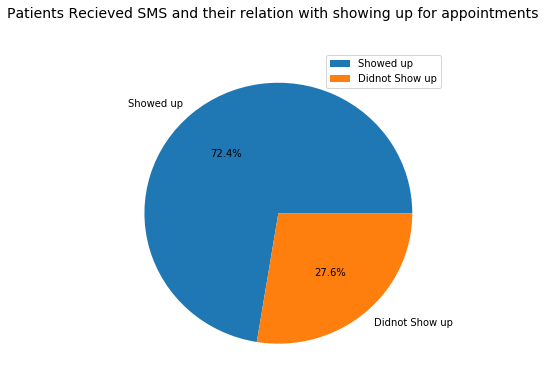

In [66]:
# Pie Blot percenteages
data = no_show_sms_counts;
labels = ['Showed up', 'Didnot Show up'];
title = 'Patients Recieved SMS and their relation with showing up for appointments'
pie_plot(data, title, labels)

>72.4% from patients that recieved sms showed for the appointments which shows a good impact of recieving sms on showing up for the appintments.

<a id='conclusions'></a>
## Conclusions

### Results
- 20.2% of patients in this data did not show up for their appointment, the factors affecting their no showing up could be more than one factor. 
- A Large percentage of patients are having hipertention about 20%, while Handcap is about 2%, Alcoholism is about 3% and Diabetes is about 7%. Although large percentage of patients suffer from hipertention, Hipertention has the least impact in the no-showing up for appointments with 17% percentge. On the other hand, Alcoholism plays the largest part in not showing up for appionments with percentage of 20%, Next comes Hancap and Diabetes with 18% each. 
- 9.8% of patients have Bosla Familia Scholarship, 23.7% from them didnot show up for the appointment and 76.3% of them showed up which means that the scholership might have a positive impact in showing up for the midical appointments. 
- Despite of gender young patients tend to not showing up for their appointments more than old patients. 
- For the days of week, The percentages of not showing up are in range (19% - 23%), with satursday having the largest prcentage and thursday having the lowest percentage. The percentages are close to each other which indicates that the day of the week mighht have a weak impact in not showiong up for appointments. 
- 32.1% of patients recieved sms about their appointment, 72.4% of them showed up for the appointments which shows a good impact of recieving sms on showing up for the appintments.

### Limitations
- The zero ages in the data are illogical and it might have affected the result which show that more young patients tend to not show up for appointments.
- Most of the data are catagorial (Boolean), so it was not easy to show correlation between diffrent factors.


## Convert to html 

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_NoShow.ipynb'])

0